## Summary
1. Load in the stock price data from `yfinance`
2. __Hypotheses__ (hypotheses to test in the model):
    - The stock price of individual companies tends to follow the general trend of the NDXT index.
    - The volume of insider transactions could potentially influence the company's stock price.
    
3. Set up the data frequency: Calculate the `net change / %`. Cumulative return will give a sense of longer-term trend of a security's performance over 5 days, and smooth out the daily fluctuations.
    - Daily change (daily return):  
      __daily_return = (today's_price - yesterday's_price) / yesterday's_price__
    - Weekly change (cumulative return):  
      __cumulative_return = (last_day's_price - first_day's_price) / first_day's_price__
      ```
      stock_price = [100, 102, 101, 104, 102]
      daily_return = [0.02, -0.00980392, 0.02970297, -0.01923077]
      cumulative_return = 0.02
      
      ```
4. Calculate the beta related to the overall market (NDXT index)
    - A beta greater than 1 indicates that the stock is more volatile than the market
    - A beta less than 1 indicates that the stock is less volatile
    - A negative beta would mean the stock generally moves in the opposite direction of the market.  
    
    `Google Beta relative to NDXT: 0.7789437540068607`  
    `Meta Beta relative to NDXT: 0.9075632001403819`  
    `Illumina Beta relative to NDXT: 0.8148821701244177`  
    `Amazon Beta relative to NDXT: 0.892975246434966`  
    `Zoom Beta relative to NDXT: 0.7817178015795084`  
    
5. Export datasets:  
    - Each dataset contains __daily_return__,__cumulative_return__, and __daily_return_ndxt__.  
    
    `goog_stock.csv`, `meta_stock.csv`, `ilmn_stock.csv`, `zoom_stock.csv`, `amzn_stock.csv`

In [92]:
import yfinance as yf

google_price = yf.download('GOOG', start='2006-01-01', end='2023-03-30')
google_price

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,10.523555,10.851077,10.416457,10.840119,10.840119,526815259
2006-01-04,11.056059,11.182087,10.952697,11.089434,11.089434,613747887
2006-01-05,11.108363,11.246595,10.996283,11.238874,11.238874,433952486
2006-01-06,11.379098,11.718576,11.288687,11.598028,11.598028,712938289
2006-01-09,11.616708,11.790805,11.480468,11.628912,11.628912,513593887
...,...,...,...,...,...,...
2023-03-23,105.889999,107.100998,105.410004,106.260002,106.260002,31385800
2023-03-24,105.739998,106.160004,104.739998,106.059998,106.059998,25236200
2023-03-27,105.320000,105.400002,102.629997,103.059998,103.059998,25393400


In [93]:
import numpy as np

google_price['daily_return'] = google_price['Adj Close'].pct_change()
google_price['cumulative_return'] = (google_price['daily_return'] + 1).rolling(window=5).apply(np.prod) - 1

google_price = google_price[['Adj Close', 'daily_return', 'cumulative_return']]

google_price

,Adj Close,daily_return,cumulative_return
Date,,,
2006-01-03,10.840119,NaN,NaN
2006-01-04,11.089434,0.022999,NaN
2006-01-05,11.238874,0.013476,NaN
2006-01-06,11.598028,0.031956,NaN
2006-01-09,11.628912,0.002663,NaN
...,...,...,...
2023-03-23,106.260002,0.019574,0.051351
2023-03-24,106.059998,-0.001882,0.035136
2023-03-27,103.059998,-0.028286,0.011086


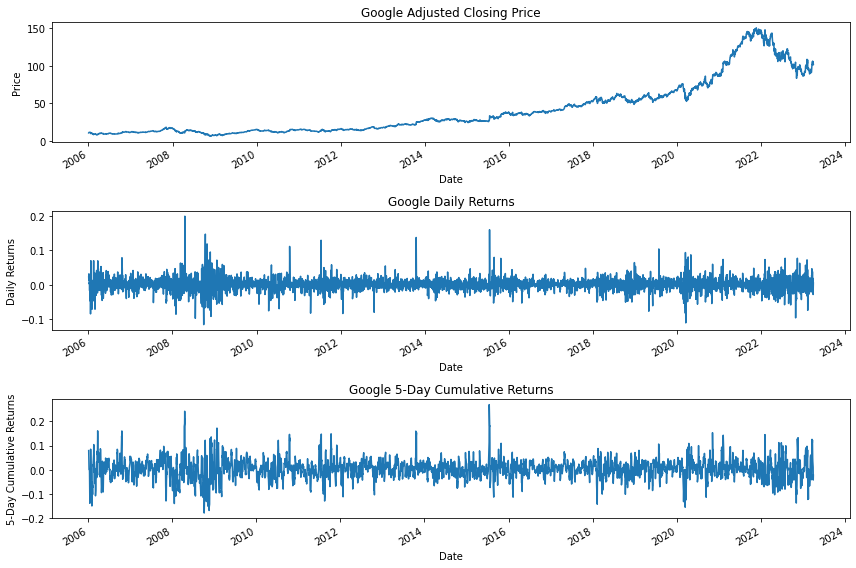

In [94]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))

google_price['Adj Close'].plot(ax=ax1)
ax1.set_title('Google Adjusted Closing Price')
ax1.set_ylabel('Price')

google_price['daily_return'].plot(ax=ax2)
ax2.set_title('Google Daily Returns')
ax2.set_ylabel('Daily Returns')

google_price['cumulative_return'].plot(ax=ax3)
ax3.set_title('Google 5-Day Cumulative Returns')
ax3.set_ylabel('5-Day Cumulative Returns')

plt.tight_layout()
plt.show()


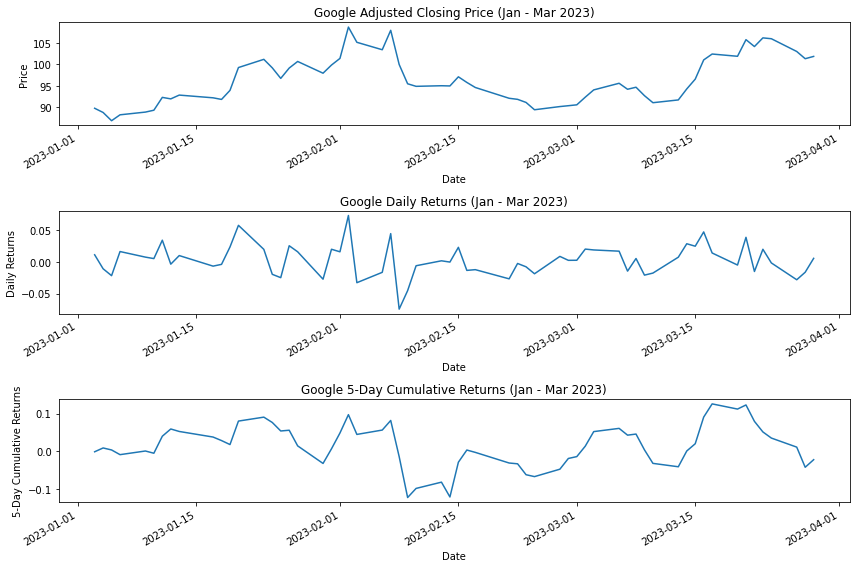

In [95]:
google_price_2023 = google_price.loc['2023-01-01':'2023-03-31']

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))

google_price_2023['Adj Close'].plot(ax=ax1)
ax1.set_title('Google Adjusted Closing Price (Jan - Mar 2023)')
ax1.set_ylabel('Price')

google_price_2023['daily_return'].plot(ax=ax2)
ax2.set_title('Google Daily Returns (Jan - Mar 2023)')
ax2.set_ylabel('Daily Returns')

google_price_2023['cumulative_return'].plot(ax=ax3)
ax3.set_title('Google 5-Day Cumulative Returns (Jan - Mar 2023)')
ax3.set_ylabel('5-Day Cumulative Returns')

plt.tight_layout()
plt.show()

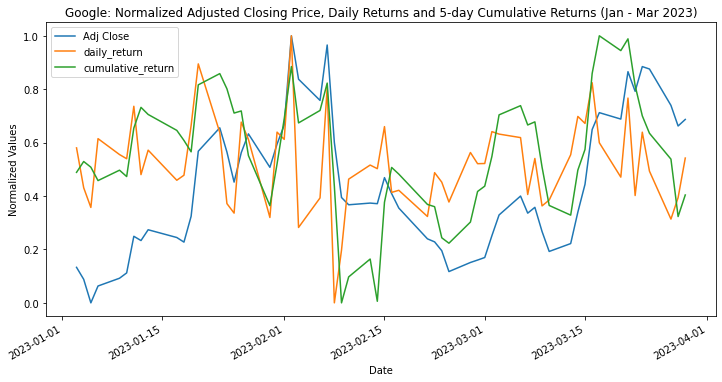

In [96]:
from sklearn.preprocessing import MinMaxScaler

google_price_scaled = google_price_2023.copy()

scaler = MinMaxScaler()

google_price_scaled[['Adj Close', 'daily_return', 'cumulative_return']] = scaler.fit_transform(google_price_scaled[['Adj Close', 'daily_return', 'cumulative_return']])

google_price_scaled[['Adj Close', 'daily_return', 'cumulative_return']].plot(figsize=(12,6))
plt.title('Google: Normalized Adjusted Closing Price, Daily Returns and 5-day Cumulative Returns (Jan - Mar 2023)')
plt.ylabel('Normalized Values')
plt.show()


In [97]:
import pandas as pd

ndxt_price = yf.download('^NDXT', start='2006-01-01', end='2023-03-30')

ndxt_price

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-02-22,1000.859985,1015.890015,996.919983,1012.979980,1012.979980,0
2006-02-23,1010.929993,1018.809998,1008.489990,1009.190002,1009.190002,0
2006-02-24,1008.989990,1014.909973,1006.609985,1012.070007,1012.070007,0
2006-02-27,1013.609985,1024.569946,1012.869995,1021.070007,1021.070007,0
2006-02-28,1019.169983,1024.339966,1006.909973,1009.840027,1009.840027,0
...,...,...,...,...,...,...
2023-03-23,6847.680176,6985.830078,6812.350098,6900.720215,6900.720215,510200
2023-03-24,6862.689941,6870.560059,6756.959961,6831.229980,6831.229980,444200
2023-03-27,6847.790039,6880.600098,6753.169922,6779.430176,6779.430176,379400


In [98]:
ndxt_price['daily_return'] = ndxt_price['Adj Close'].pct_change()

ndxt_price = ndxt_price[['Adj Close', 'daily_return']]

ndxt_price

,Adj Close,daily_return
Date,,
2006-02-22,1012.979980,NaN
2006-02-23,1009.190002,-0.003741
2006-02-24,1012.070007,0.002854
2006-02-27,1021.070007,0.008893
2006-02-28,1009.840027,-0.010998
...,...,...
2023-03-23,6900.720215,0.024057
2023-03-24,6831.229980,-0.010070
2023-03-27,6779.430176,-0.007583


In [99]:
import pandas as pd

google_price = pd.merge(google_price, ndxt_price, on='Date', suffixes=('_google', '_ndxt'))

google_price

,Adj Close_google,daily_return_google,cumulative_return,Adj Close_ndxt,daily_return_ndxt
Date,,,,,
2006-02-22,9.103129,-0.003001,0.064575,1012.979980,NaN
2006-02-23,9.416455,0.034420,0.104241,1009.190002,-0.003741
2006-02-24,9.399767,-0.001772,0.029853,1012.070007,0.002854
2006-02-27,9.723056,0.034393,0.058658,1021.070007,0.008893
2006-02-28,9.031647,-0.071110,-0.010830,1009.840027,-0.010998
...,...,...,...,...,...
2023-03-23,106.260002,0.019574,0.051351,6900.720215,0.024057
2023-03-24,106.059998,-0.001882,0.035136,6831.229980,-0.010070
2023-03-27,103.059998,-0.028286,0.011086,6779.430176,-0.007583


<AxesSubplot:xlabel='Date'>

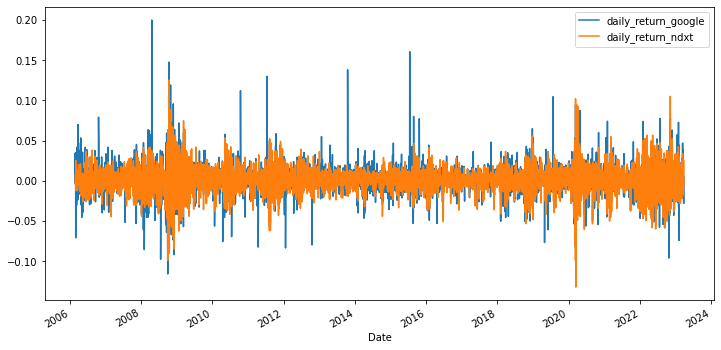

In [100]:
google_price[['daily_return_google', 'daily_return_ndxt']].plot(figsize=(12,6))

In [101]:
covariance = google_price['daily_return_google'].cov(google_price['daily_return_ndxt'])

variance = google_price['daily_return_ndxt'].var()

beta = covariance / variance

print('Google Beta relative to NDXT:', beta)

Google Beta relative to NDXT: 0.7789437540068607


In [102]:
google_price.rename(columns={'daily_return_google': 'daily_return'}, inplace=True)

google_price = google_price[['daily_return', 'cumulative_return', 'daily_return_ndxt']]

google_price.to_csv('./data/goog_stock.csv', index=True)

In [103]:
meta_price = yf.download('META', start='2006-01-01', end='2023-03-30')
meta_price['daily_return'] = meta_price['Adj Close'].pct_change()
meta_price['cumulative_return'] = (meta_price['daily_return'] + 1).rolling(window=5).apply(np.prod) - 1

meta_price = meta_price[['Adj Close', 'daily_return', 'cumulative_return']]

meta_price

[*********************100%***********************]  1 of 1 completed


,Adj Close,daily_return,cumulative_return
Date,,,
2012-05-18,38.230000,NaN,NaN
2012-05-21,34.029999,-0.109861,NaN
2012-05-22,31.000000,-0.089039,NaN
2012-05-23,32.000000,0.032258,NaN
2012-05-24,33.029999,0.032187,NaN
...,...,...,...
2023-03-23,204.279999,0.022371,-0.003172
2023-03-24,206.009995,0.008469,0.053167
2023-03-27,202.839996,-0.015388,0.025428


In [104]:
meta_price = pd.merge(meta_price, ndxt_price, on='Date', suffixes=('_meta', '_ndxt'))
covariance = meta_price['daily_return_meta'].cov(meta_price['daily_return_ndxt'])

variance = meta_price['daily_return_ndxt'].var()

beta = covariance / variance

print('Meta Beta relative to NDXT:', beta)

meta_price.rename(columns={'daily_return_meta': 'daily_return'}, inplace=True)

meta_price = meta_price[['daily_return', 'cumulative_return', 'daily_return_ndxt']]

meta_price.to_csv('./data/meta_stock.csv', index=True)

Meta Beta relative to NDXT: 0.9075632001403819


In [105]:
ilmn_price = yf.download('ILMN', start='2006-01-01', end='2023-03-30')
ilmn_price['daily_return'] = ilmn_price['Adj Close'].pct_change()
ilmn_price['cumulative_return'] = (ilmn_price['daily_return'] + 1).rolling(window=5).apply(np.prod) - 1

ilmn_price = ilmn_price[['Adj Close', 'daily_return', 'cumulative_return']]

ilmn_price

[*********************100%***********************]  1 of 1 completed


,Adj Close,daily_return,cumulative_return
Date,,,
2006-01-03,7.405000,NaN,NaN
2006-01-04,7.650000,0.033086,NaN
2006-01-05,7.740000,0.011765,NaN
2006-01-06,8.230000,0.063307,NaN
2006-01-09,8.115000,-0.013973,NaN
...,...,...,...
2023-03-23,216.949997,-0.001059,-0.035563
2023-03-24,220.000000,0.014059,-0.020263
2023-03-27,217.820007,-0.009909,-0.008873


In [106]:
ilmn_price = pd.merge(ilmn_price, ndxt_price, on='Date', suffixes=('_ilmn', '_ndxt'))
covariance = ilmn_price['daily_return_ilmn'].cov(ilmn_price['daily_return_ndxt'])

variance = ilmn_price['daily_return_ndxt'].var()

beta = covariance / variance

print('Illumina Beta relative to NDXT:', beta)

ilmn_price.rename(columns={'daily_return_ilmn': 'daily_return'}, inplace=True)

ilmn_price = ilmn_price[['daily_return', 'cumulative_return', 'daily_return_ndxt']]

ilmn_price.to_csv('./data/ilmn_stock.csv', index=True)

Illumina Beta relative to NDXT: 0.8148821701244177


In [107]:
amazon_price = yf.download('AMZN', start='2006-01-01', end='2023-03-30')
amazon_price['daily_return'] = amazon_price['Adj Close'].pct_change()
amazon_price['cumulative_return'] = (amazon_price['daily_return'] + 1).rolling(window=5).apply(np.prod) - 1

amazon_price = amazon_price[['Adj Close', 'daily_return', 'cumulative_return']]

amazon_price

[*********************100%***********************]  1 of 1 completed


,Adj Close,daily_return,cumulative_return
Date,,,
2006-01-03,2.379000,NaN,NaN
2006-01-04,2.362500,-0.006936,NaN
2006-01-05,2.382500,0.008466,NaN
2006-01-06,2.393500,0.004617,NaN
2006-01-09,2.354000,-0.016503,NaN
...,...,...,...
2023-03-23,98.709999,0.000101,-0.013295
2023-03-24,98.129997,-0.005876,-0.008287
2023-03-27,98.040001,-0.000917,0.003377


In [108]:
amazon_price = pd.merge(amazon_price, ndxt_price, on='Date', suffixes=('_amazon', '_ndxt'))
covariance = amazon_price['daily_return_amazon'].cov(ilmn_price['daily_return_ndxt'])

variance = amazon_price['daily_return_ndxt'].var()

beta = covariance / variance

print('Amazon Beta relative to NDXT:', beta)

amazon_price.rename(columns={'daily_return_amazon': 'daily_return'}, inplace=True)

amazon_price = amazon_price[['daily_return', 'cumulative_return', 'daily_return_ndxt']]

amazon_price.to_csv('./data/amazon_stock.csv', index=True)

Amazon Beta relative to NDXT: 0.892975246434966


In [109]:
zoom_price = yf.download('ZM', start='2006-01-01', end='2023-03-30')
zoom_price['daily_return'] = zoom_price['Adj Close'].pct_change()
zoom_price['cumulative_return'] = (zoom_price['daily_return'] + 1).rolling(window=5).apply(np.prod) - 1

zoom_price = zoom_price[['Adj Close', 'daily_return', 'cumulative_return']]

zoom_price

[*********************100%***********************]  1 of 1 completed


,Adj Close,daily_return,cumulative_return
Date,,,
2019-04-18,62.000000,NaN,NaN
2019-04-22,65.699997,0.059677,NaN
2019-04-23,69.000000,0.050228,NaN
2019-04-24,63.200001,-0.084058,NaN
2019-04-25,65.000000,0.028481,NaN
...,...,...,...
2023-03-23,69.190002,0.006400,-0.019833
2023-03-24,69.040001,-0.002168,-0.002168
2023-03-27,68.570000,-0.006808,-0.010534


In [110]:
zoom_price = pd.merge(zoom_price, ndxt_price, on='Date', suffixes=('_zoom', '_ndxt'))
covariance = zoom_price['daily_return_zoom'].cov(ilmn_price['daily_return_ndxt'])

variance = zoom_price['daily_return_ndxt'].var()

beta = covariance / variance

print('Zoom Beta relative to NDXT:', beta)

zoom_price.rename(columns={'daily_return_zoom': 'daily_return'}, inplace=True)

zoom_price = zoom_price[['daily_return', 'cumulative_return', 'daily_return_ndxt']]

zoom_price.to_csv('./data/zoom_stock.csv', index=True)

Zoom Beta relative to NDXT: 0.7817178015795084
